# T07.01 - Smoothing and Noise Reduction

## ANGGOTA KELOMPOK


1.   Elmir Yasakha - 442303611058
2.   HIkam Ibnu - 442303611044
3.   M Rizqi Anugrah - 442303611041
4.   Dziffar J - 442303611055
5.   Arifin Zulfan - 442303611043
6.   Rahmat Abdurrahman - 442023611047


In [2]:
!pip install -q kaggle

from google.colab import files
import os

uploaded = files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


!kaggle datasets download -d suryaprabhakaran2005/road-accidents-from-cctv-footages-dataset
!unzip -q road-accidents-from-cctv-footages-dataset.zip -d road_accidents_dataset

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/suryaprabhakaran2005/road-accidents-from-cctv-footages-dataset
License(s): MIT
 97% 651M/670M [00:01<00:00, 267MB/s]
100% 670M/670M [00:03<00:00, 179MB/s]


In [13]:
# Import library
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

image_path = '/content/road_accidents_dataset/Accident/Accident/1.jpg'

# Inisialisasi variabel untuk menampung citra
gray_image = None
noisy_image = None

original_image = cv2.imread(image_path)
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)


def add_salt_pepper_noise(image, amount=0.05):
    noisy_image = np.copy(image)
    # Salt
    num_salt = np.ceil(amount * image.size * 0.5)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    noisy_image[coords[0], coords[1]] = 255
    # Pepper
    num_pepper = np.ceil(amount * image.size * 0.5)
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    noisy_image[coords[0], coords[1]] = 0
    return noisy_image

# Buat citra yang terganggu oleh noise
noisy_image = add_salt_pepper_noise(gray_image)
print("Noise 'salt-and-pepper' telah ditambahkan pada citra.")

Noise 'salt-and-pepper' telah ditambahkan pada citra.


In [14]:
kernel_size = 5

# Mean Filter
mean_filtered = cv2.blur(noisy_image, (kernel_size, kernel_size))

# Median Filter
median_filtered = cv2.medianBlur(noisy_image, kernel_size)

# Gaussian Filter
gaussian_filtered = cv2.GaussianBlur(noisy_image, (kernel_size, kernel_size), 0)

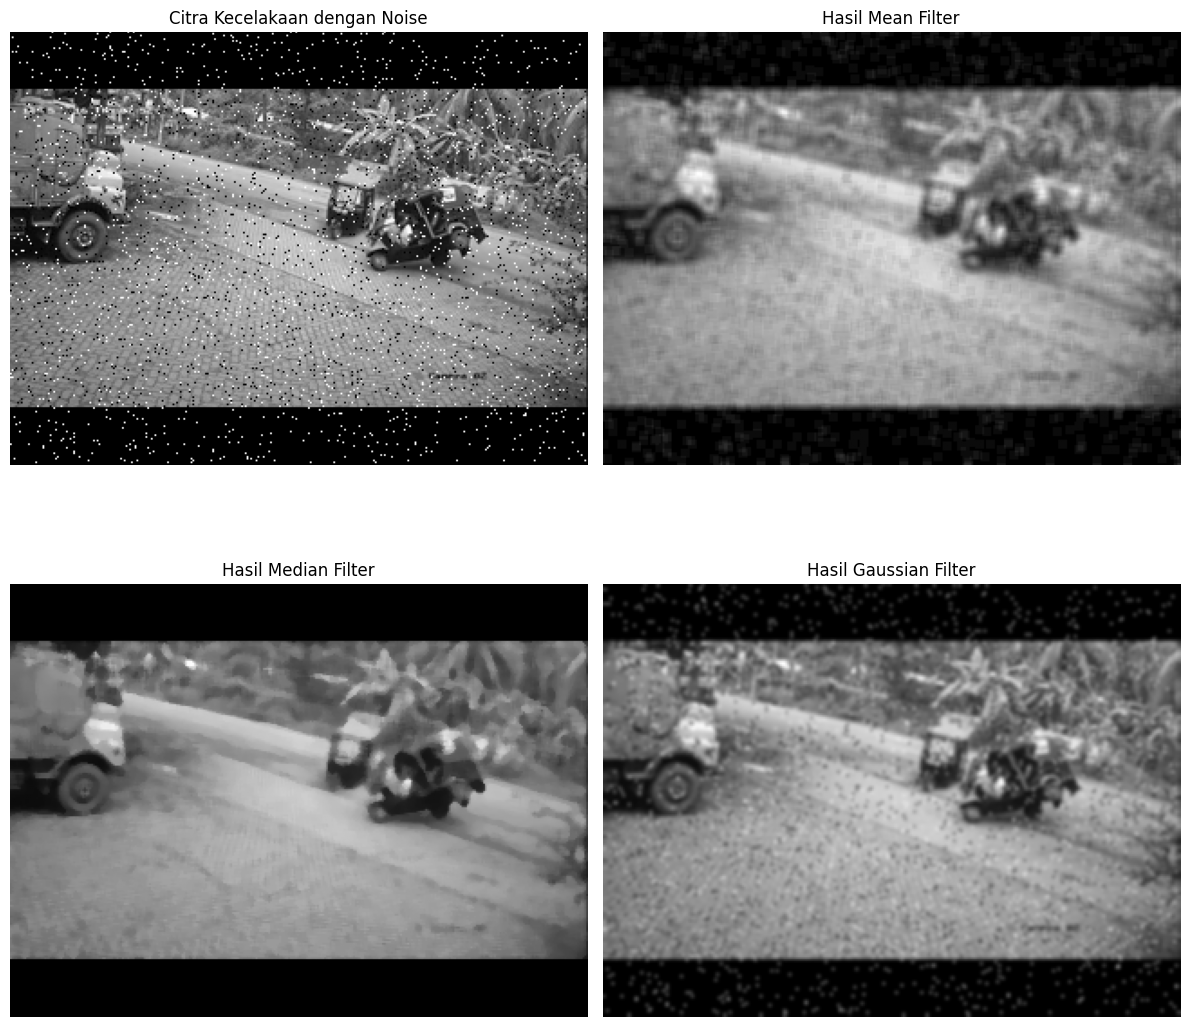

In [12]:
plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Citra Asli dengan Noise
axes[0, 0].imshow(noisy_image, cmap='gray')
axes[0, 0].set_title('Citra Kecelakaan dengan Noise')
axes[0, 0].axis('off')

# Hasil Mean Filter
axes[0, 1].imshow(mean_filtered, cmap='gray')
axes[0, 1].set_title(f'Hasil Mean Filter')
axes[0, 1].axis('off')

# Hasil Median Filter
axes[1, 0].imshow(median_filtered, cmap='gray')
axes[1, 0].set_title(f'Hasil Median Filter')
axes[1, 0].axis('off')

# Hasil Gaussian Filter
axes[1, 1].imshow(gaussian_filtered, cmap='gray')
axes[1, 1].set_title(f'Hasil Gaussian Filter')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

# Hasil Analisis (Diskusi)

Setelah melihat hasil visual di atas, kita dapat menganalisis performa setiap filter.

1. Filter Rata-rata (Mean Filter)
Kelebihan: Implementasinya sederhana dan prosesnya sangat cepat.

Kekurangan: Menghasilkan gambar yang paling kabur. Detail penting seperti bentuk kendaraan. Filter ini juga gagal menghilangkan noise salt-and-pepper secara bersih, malah menyebarkannya menjadi noda abu-abu.

2. Filter Median (Median Filter)
Kelebihan: Paling efektif untuk menghilangkan noise salt-and-pepper. Bintik-bintik putih dan hitam hilang hampir sempurna. Filter ini juga mampu mempertahankan ketajaman tepi objek jauh lebih baik daripada dua filter lainnya.

Kekurangan: Jika detail citra sangat halus, filter ini berisiko menghilangkan detail penting pada citra.

3. Filter Gaussian (Gaussian Blur)
Kelebihan: Menghasilkan blur yang lebih alami dan halus dibandingkan mean filter.

Kekurangan: Masih mengaburkan detail pada citra secara signifikan. Untuk noise jenis salt-and-pepper, filter ini tidak seefektif median filter. Beberapa bintik noise masih tersisa meskipun sudah lebih samar.